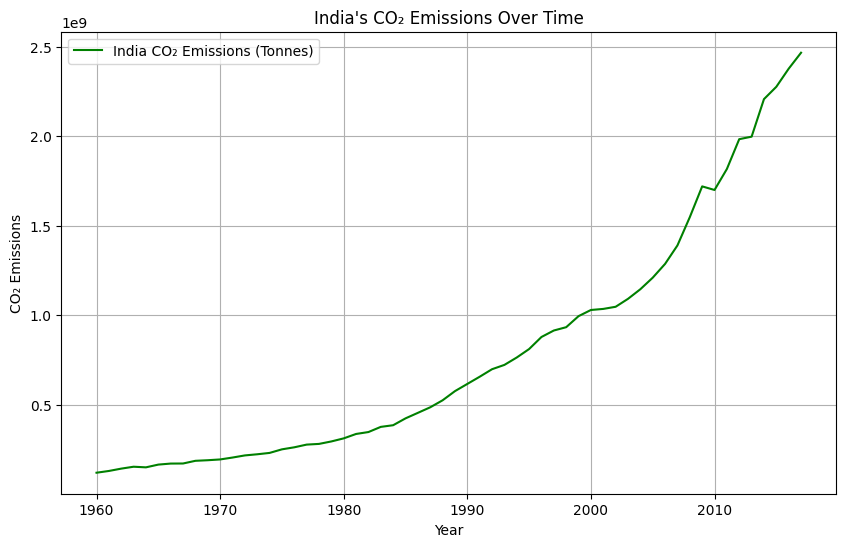

07:33:04 - cmdstanpy - INFO - Chain [1] start processing
07:33:05 - cmdstanpy - INFO - Chain [1] done processing


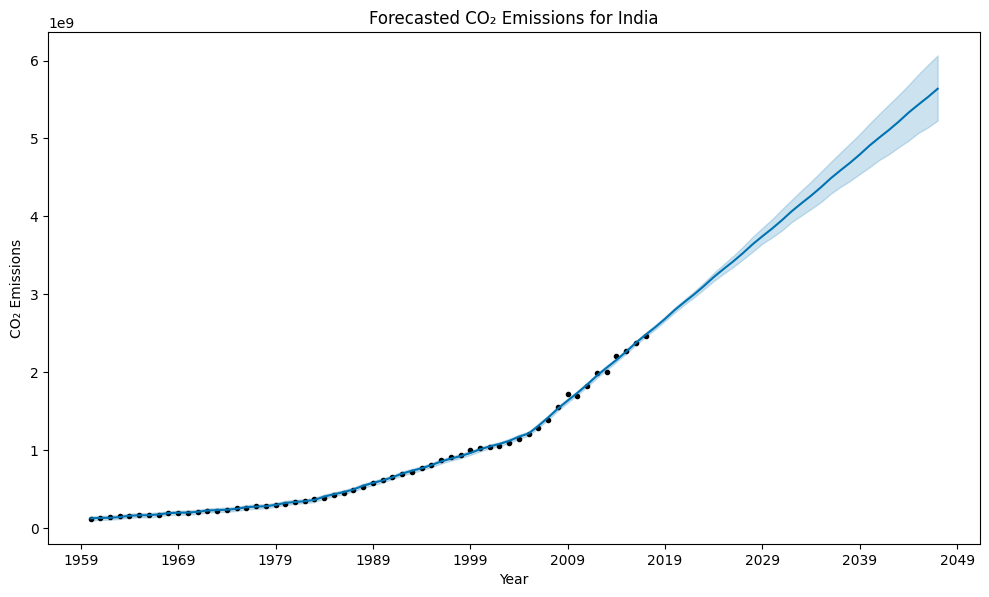

           ds          yhat    yhat_lower    yhat_upper
78 2038-01-01  4.687768e+09  4.454792e+09  4.936727e+09
79 2039-01-01  4.794195e+09  4.544209e+09  5.057007e+09
80 2040-01-01  4.908355e+09  4.630163e+09  5.189737e+09
81 2041-01-01  5.011076e+09  4.724187e+09  5.314350e+09
82 2042-01-01  5.109765e+09  4.798134e+09  5.436664e+09
83 2043-01-01  5.216192e+09  4.888413e+09  5.556703e+09
84 2044-01-01  5.330352e+09  4.970711e+09  5.684841e+09
85 2045-01-01  5.433072e+09  5.069927e+09  5.820487e+09
86 2046-01-01  5.531761e+09  5.142455e+09  5.945020e+09
87 2047-01-01  5.638188e+09  5.231220e+09  6.066427e+09

Forecasted CO₂ Emissions for India in 2030:
           ds          yhat    yhat_lower    yhat_upper
70 2030-01-01  3.843776e+09  3.729923e+09  3.963769e+09


In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 2: Load dataset
df = pd.read_csv('/kaggle/input/co2-ghg-emissionsdata/co2_emission.csv')

# Step 3: Rename columns for simplicity
df = df.rename(columns={
    'Entity': 'country',
    'Annual CO₂ emissions (tonnes )': 'co2',
    'Year': 'year'
})

# Step 4: Filter only for India and recent years (from 1960 onwards)
df_india = df[(df['country'] == 'India') & (df['year'] >= 1960)]

# Step 5: Drop missing values and select relevant columns
df_india = df_india[['year', 'co2']].dropna()

# Step 6: Rename for Prophet
df_india = df_india.rename(columns={'year': 'ds', 'co2': 'y'})
df_india['ds'] = pd.to_datetime(df_india['ds'].astype(str), format='%Y', errors='coerce')

# Step 7: Visualize India's CO₂ emissions
plt.figure(figsize=(10, 6))
plt.plot(df_india['ds'], df_india['y'], label='India CO₂ Emissions (Tonnes)', color='green')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.title('India\'s CO₂ Emissions Over Time')
plt.legend()
plt.grid()
plt.show()

# Step 8: Forecast with Prophet
model = Prophet()
model.fit(df_india)

# Step 9: Create future dataframe (next 30 years)
future = model.make_future_dataframe(periods=30, freq='YS')  # 'YS' = Year Start

# Step 10: Predict future CO₂ emissions
forecast = model.predict(future)

# Step 11: Plot forecast
model.plot(forecast)
plt.title('Forecasted CO₂ Emissions for India')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.grid()
plt.show()

# Step 12: Optional – View last 10 forecast values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# Step 13: Forecast for the year 2030
forecast_2030 = forecast[forecast['ds'].dt.year == 2030]
if not forecast_2030.empty:
    print("\nForecasted CO₂ Emissions for India in 2030:")
    print(forecast_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
else:
    print("Forecast for 2030 not available.")

